# Stock Market Analysis MTN Group

Importing libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
import pandas as pd
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.


Importing the training data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2009-12-31,30.85,31.15,30.70,30.97,373300,0.0,0
1,2010-01-04,31.25,31.59,29.67,29.88,573000,0.0,0
2,2010-01-05,29.92,30.24,29.33,29.94,543200,0.0,0
3,2010-01-06,29.86,29.92,28.63,29.03,638700,0.0,0
4,2010-01-07,29.09,29.66,28.69,29.49,321900,0.0,0


Plotting the closing price

In [4]:
train['Date'] = pd.to_datetime(train.Date,format = '%Y-%m-%d')

In [5]:
train.index = train['Date']

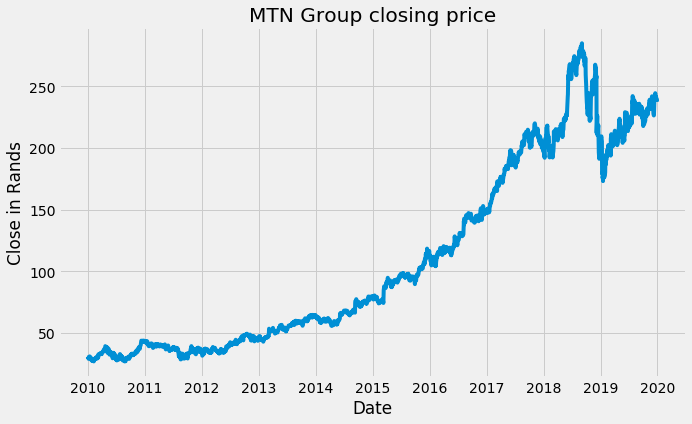

In [6]:
#Plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close in Rands')
plt.plot(train['Close'])
plt.title('MTN Group closing price')
plt.show()

Moving Average of MTN Group. 

No handles with labels found to put in legend.


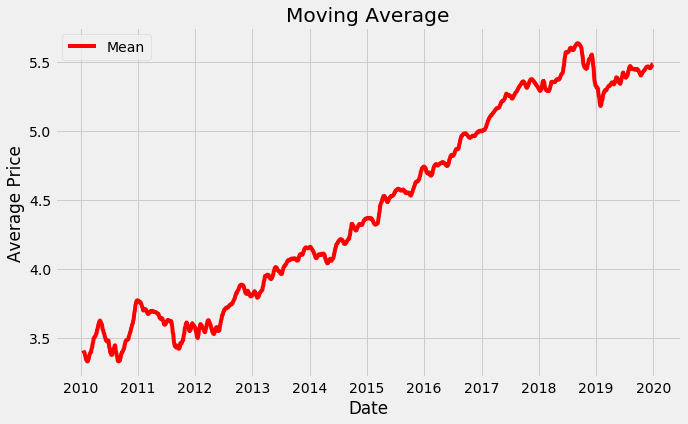

In [7]:
rcParams['figure.figsize'] = 10,6
df_log = np.log(train['Close'])
moving_avg = df_log.rolling(12).mean()
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Moving Average')
plt.plot(moving_avg,color="red",label="Mean")
plt.legend()
plt.savefig('Moving_Average')
#plt.show()

We will make our predictions based on the closing price.

In [8]:
# We define a dataframe that only contains the date and closing price.
data = train.sort_index(ascending=True, axis=0)
Closing_price = pd.DataFrame(index=range(0,len(train)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    Closing_price['Date'][i] = data['Date'][i]
    Closing_price['Close'][i] = data['Close'][i]

In [9]:
Closing_price

,Date,Close
0,2009-12-31 00:00:00,30.97
1,2010-01-04 00:00:00,29.88
2,2010-01-05 00:00:00,29.94
3,2010-01-06 00:00:00,29.03
4,2010-01-07 00:00:00,29.49
...,...,...
2511,2019-12-23 00:00:00,240.88
2512,2019-12-24 00:00:00,241.2
2513,2019-12-26 00:00:00,239.08
2514,2019-12-27 00:00:00,239.34


Indexing the date.

In [10]:
#setting index
Closing_price.index = Closing_price.Date
Closing_price.drop('Date', axis=1, inplace=True)

In [11]:
Closing_price

,Close
Date,
2009-12-31,30.97
2010-01-04,29.88
2010-01-05,29.94
2010-01-06,29.03
2010-01-07,29.49
...,...
2019-12-23,240.88
2019-12-24,241.2
2019-12-26,239.08


Modeling  

In [12]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Closing_price)

In [13]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train

array([[[0.01551049],
        [0.01128388],
        [0.01151654],
        ...,
        [0.0262515 ],
        [0.02481678],
        [0.02489433]],

       [[0.01128388],
        [0.01151654],
        [0.0079879 ],
        ...,
        [0.02481678],
        [0.02489433],
        [0.02574741]],

       [[0.01151654],
        [0.0079879 ],
        [0.00977161],
        ...,
        [0.02489433],
        [0.02574741],
        [0.02280042]],

       ...,

       [[0.75764861],
        [0.7398891 ],
        [0.7579976 ],
        ...,
        [0.83365001],
        [0.82946217],
        [0.83070301]],

       [[0.7398891 ],
        [0.7579976 ],
        [0.76687735],
        ...,
        [0.82946217],
        [0.83070301],
        [0.82248245]],

       [[0.7579976 ],
        [0.76687735],
        [0.75194851],
        ...,
        [0.83070301],
        [0.82248245],
        [0.82349064]]])

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 133s - loss: 0.0014
Epoch 2/10
 - 129s - loss: 5.0149e-04
Epoch 3/10
 - 127s - loss: 2.9615e-04
Epoch 4/10
 - 126s - loss: 2.9557e-04
Epoch 5/10
 - 125s - loss: 2.5696e-04
Epoch 6/10
 - 126s - loss: 2.1864e-04
Epoch 7/10
 - 124s - loss: 2.1095e-04
Epoch 8/10
 - 132s - loss: 2.1745e-04
Epoch 9/10
 - 132s - loss: 1.8506e-04
Epoch 10/10
 - 127s - loss: 2.0304e-04


In [36]:
test = pd.read_csv('test.csv') #validation

In [37]:
test.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-31,236.94,237.55,235.62,236.87,201600,0,0
1,2020-01-02,237.71,240.50,236.08,240.48,274800,0,0
2,2020-01-03,238.61,241.76,238.18,240.76,215200,0,0
3,2020-01-06,239.30,242.40,237.85,242.29,248400,0,0
4,2020-01-07,242.16,244.25,241.34,241.50,355400,0,0


In [38]:
#predicting 246 values, using past 60 from the train data
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = Closing_price[len(Closing_price['Close']) - len(test['Close']) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [39]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [40]:
closing_price

array([[234.9767 ],
       [231.58119],
       [231.08269],
       [236.58385],
       [236.00674],
       [235.95488],
       [236.00757],
       [239.80574],
       [240.77594],
       [242.9178 ],
       [240.3773 ],
       [238.70213],
       [242.14961],
       [241.92831],
       [239.65585],
       [238.07872],
       [235.48648],
       [235.94824],
       [237.52457],
       [244.33972],
       [245.9097 ],
       [241.73732],
       [239.9424 ],
       [236.35434],
       [235.32434],
       [235.46494],
       [232.3456 ],
       [230.40892],
       [232.55518],
       [237.84802],
       [241.57549],
       [242.06313],
       [247.03755],
       [245.69456],
       [248.12167],
       [243.89641],
       [245.74525],
       [244.72084],
       [245.14285],
       [243.0197 ],
       [243.35753]], dtype=float32)

In [41]:
closing_price.shape

(41, 1)

In [42]:
test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-31,236.94,237.55,235.62,236.87,201600,0,0
1,2020-01-02,237.71,240.50,236.08,240.48,274800,0,0
2,2020-01-03,238.61,241.76,238.18,240.76,215200,0,0
3,2020-01-06,239.30,242.40,237.85,242.29,248400,0,0
4,2020-01-07,242.16,244.25,241.34,241.50,355400,0,0
5,2020-01-08,240.89,246.83,240.87,245.67,337600,0,0
6,2020-01-09,246.21,250.86,241.98,249.94,684300,0,0
7,2020-01-10,250.86,250.86,246.03,248.30,364100,0,0
8,2020-01-13,248.35,252.22,246.19,251.64,312300,0,0
9,2020-01-14,250.88,251.62,247.47,248.04,285800,0,0


In [44]:
real_stock_price = test['Close'] #validation

In [45]:
real_stock_price

0     236.87
1     240.48
2     240.76
3     242.29
4     241.50
5     245.67
6     249.94
7     248.30
8     251.64
9     248.04
10    242.30
11    246.23
12    246.36
13    246.92
14    246.80
15    246.92
16    240.87
17    235.55
18    233.72
19    233.83
20    234.16
21    231.62
22    232.41
23    235.40
24    236.69
25    235.05
26    232.99
27    238.56
28    241.82
29    242.63
30    245.02
31    246.33
32    245.14
33    242.47
34    245.47
35    248.56
36    239.22
37    227.89
38    217.65
39    209.60
40    209.99
Name: Close, dtype: float64

In [46]:
predicted_stock_price = closing_price

In [47]:
predicted_stock_price

array([[234.9767 ],
       [231.58119],
       [231.08269],
       [236.58385],
       [236.00674],
       [235.95488],
       [236.00757],
       [239.80574],
       [240.77594],
       [242.9178 ],
       [240.3773 ],
       [238.70213],
       [242.14961],
       [241.92831],
       [239.65585],
       [238.07872],
       [235.48648],
       [235.94824],
       [237.52457],
       [244.33972],
       [245.9097 ],
       [241.73732],
       [239.9424 ],
       [236.35434],
       [235.32434],
       [235.46494],
       [232.3456 ],
       [230.40892],
       [232.55518],
       [237.84802],
       [241.57549],
       [242.06313],
       [247.03755],
       [245.69456],
       [248.12167],
       [243.89641],
       [245.74525],
       [244.72084],
       [245.14285],
       [243.0197 ],
       [243.35753]], dtype=float32)

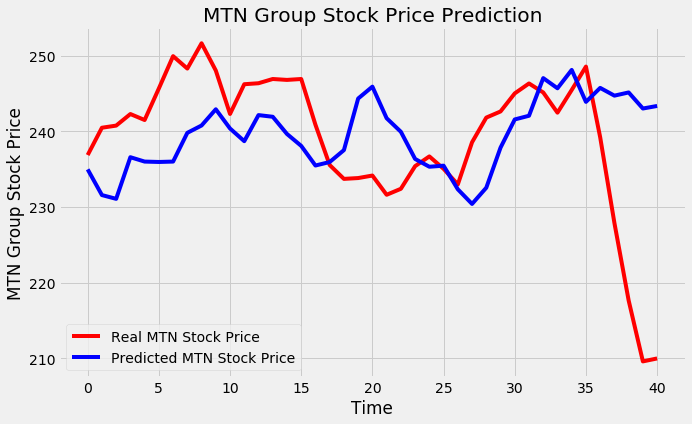

In [48]:
plt.plot(real_stock_price, color = 'red', label = 'Real MTN Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted MTN Stock Price')
plt.title('MTN Group Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MTN Group Stock Price')
plt.legend()
plt.show()

# ARIMA 

In [29]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

<Figure size 1296x576 with 0 Axes>

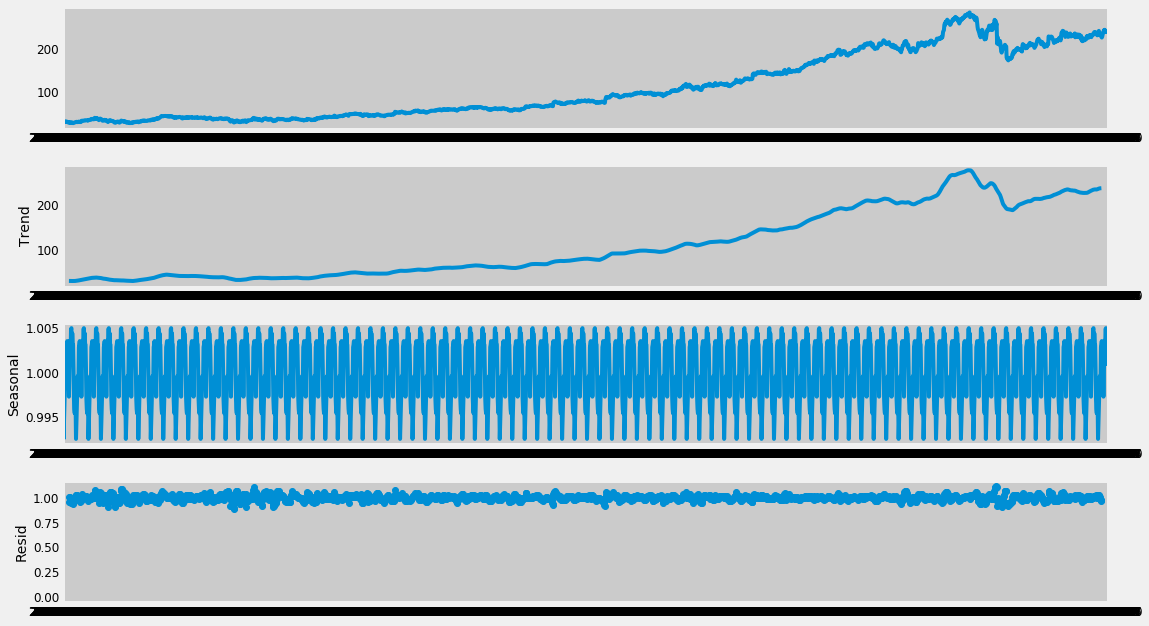

In [31]:
result = seasonal_decompose(Closing_price, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [37]:
model_autoARIMA = auto_arima(Closing_price, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=11176.466, BIC=11188.126, Time=0.088 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=11160.813, BIC=11178.303, Time=0.220 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=11161.902, BIC=11179.392, Time=0.336 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=11177.868, BIC=11183.698, Time=0.118 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=11161.212, BIC=11184.532, Time=0.332 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=11162.119, BIC=11185.439, Time=0.603 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=11159.817, BIC=11188.967, Time=1.068 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=11157.176, BIC=11192.156, Time=1.009 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=11155.396, BIC=11184.546, Time=0.533 seconds
Total fit time: 4.336 seconds
                               SARIMAX Results                                
D

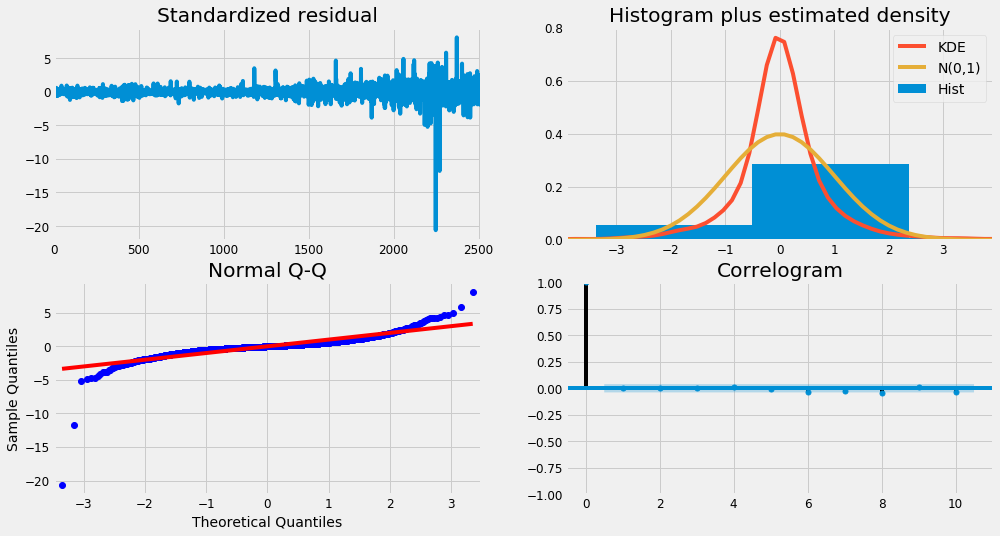

In [38]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [39]:
model = ARIMA(np.array(Closing_price), order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5569.641
Method:                       css-mle   S.D. of innovations              2.216
Date:                Sat, 20 Jun 2020   AIC                          11153.282
Time:                        14:06:05   BIC                          11194.093
Sample:                             1   HQIC                         11168.094
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0821      0.043      1.901      0.057      -0.003       0.167
ar.L1.D.y      1.0435      0.070     14.896      0.000       0.906       1.181
ar.L2.D.y     -0.7139      0.117     -6.119      0.0

In [40]:
# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)

In [41]:
fc

array([237.69075048, 237.67870772, 237.60770049, 237.58507571,
       237.67216773, 237.8423439 , 238.0183279 , 238.1352358 ,
       238.18193902, 238.19724634, 238.23304495, 238.31636683,
       238.43631919, 238.55948287, 238.65732499, 238.72450611,
       238.77759758, 238.83921856, 238.92142644, 239.01977634,
       239.11982157, 239.20901954, 239.28483086, 239.35432639,
       239.42736354, 239.50931585, 239.59837842, 239.68830842,
       239.77359442, 239.85303758, 239.92965273, 240.0077344 ,
       240.08967548, 240.17474718, 240.26025279, 240.3437714 ,
       240.42474057, 240.50444477, 240.58475439, 240.66673418,
       240.7500918 ])

In [42]:
se

array([ 2.21581531,  3.00215645,  3.66251137,  4.26806879,  4.82370679,
        5.31657369,  5.74538778,  6.12523514,  6.47792697,  6.82053666,
        7.15910131,  7.48964401,  7.80488483,  8.10118409,  8.38086474,
        8.6497829 ,  8.91326625,  9.17338461,  9.42887747,  9.67722337,
        9.91700668, 10.14889416, 10.37493609, 10.5971167 , 10.81628537,
       11.03206404, 11.24357202, 11.45029995, 11.65250799, 11.85099955,
       12.04657928, 12.2396304 , 12.43006209, 12.61757743, 12.80201012,
       12.98348765, 13.16235348, 13.33895812, 13.5134897 , 13.68594791,
       13.85624612])

In [43]:
conf

array([[233.34783227, 242.03366868],
       [231.79458921, 243.56282624],
       [230.4293101 , 244.78609087],
       [229.21981459, 245.95033683],
       [228.21787615, 247.1264593 ],
       [227.42205094, 248.26263686],
       [226.75757477, 249.27908104],
       [226.12999553, 250.14047607],
       [225.48543547, 250.87844258],
       [224.82924013, 251.56525254],
       [224.20146421, 252.26462569],
       [223.63693431, 252.99579935],
       [223.13902601, 253.73361237],
       [222.68145381, 254.43751192],
       [222.23113195, 255.08351803],
       [221.77124316, 255.67776907],
       [221.30791674, 256.24727841],
       [220.85971512, 256.81872201],
       [220.44116618, 257.4016867 ],
       [220.05276707, 257.98678561],
       [219.68284565, 258.55679749],
       [219.31755251, 259.10048658],
       [218.95032977, 259.61933194],
       [218.58435933, 260.12429346],
       [218.22783376, 260.62689332],
       [217.88686764, 261.13176405],
       [217.5613822 , 261.63537464],
 

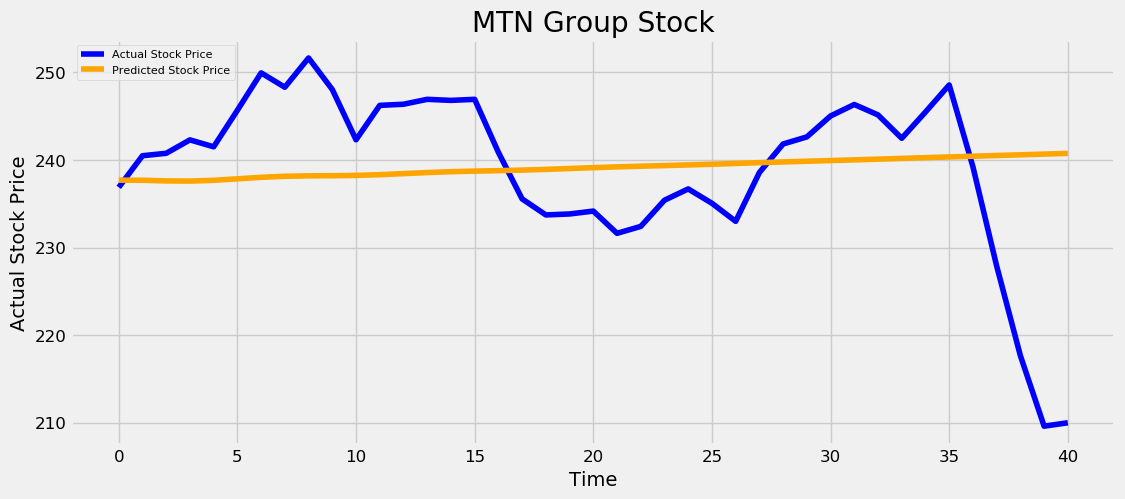

In [44]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_data, label='training')
plt.plot(test['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.10)
plt.title('MTN Group Stock')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()